# Market Basket Analysis

* Market Basket Analysis is a powerful tool for translating vast amounts of customer transaction and viewing data into simple rules for product promotion and recommendation.

## Association Mining

Searches for frequent items in the data set. In frequent mining usually, interesting associations and correlations between item sets in transactional and relational databases are found. In short, Frequent Mining shows which items appear together in a transaction or relationship. 

### Importing Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [98]:
df = pd.read_csv("Grocery.csv",encoding='latin1')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## Data Preprocessing:

In [99]:
df.shape

(38765, 3)

In [100]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [102]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [103]:
#missing values
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [104]:
#duplicates
df.duplicated().any()

True

In [105]:
df[df.duplicated()]

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [106]:
df1=df.drop_duplicates()
df1.shape

(38006, 3)

## Date column to datetime format

In [107]:
df1['Date']=pd.to_datetime(df1['Date'])
df1.sort_values('Date')

C:\Users\shromana\AppData\Local\Temp\ipykernel_12228\2292883946.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Date']=pd.to_datetime(df1['Date'])
C:\Users\shromana\AppData\Local\Temp\ipykernel_12228\2292883946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date']=pd.to_datetime(df1['Date'])


,Member_number,Date,itemDescription
15535,1659,2014-01-01,specialty chocolate
26214,1249,2014-01-01,coffee
35406,3681,2014-01-01,dishes
13242,3942,2014-01-01,other vegetables
34101,3956,2014-01-01,waffles
...,...,...,...
19048,3562,2015-12-30,ice cream
24048,2997,2015-12-30,domestic eggs
5928,1491,2015-12-30,chicken
32490,2970,2015-12-30,rolls/buns


In [108]:
df1.Member_number.nunique()

3898

In [109]:
df1.itemDescription.nunique()

167

# Items Purchased

## Top 10 items Purchased

In [110]:
df1.itemDescription.value_counts().head(10)

whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: itemDescription, dtype: int64

In [111]:
item_distr=df1.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False).head(10)

In [112]:
item_distr

,itemDescription,Frequency
164,whole milk,2363
102,other vegetables,1827
122,rolls/buns,1646
138,soda,1453
165,yogurt,1285
123,root vegetables,1041
156,tropical fruit,1014
12,bottled water,908
130,sausage,903
30,citrus fruit,795


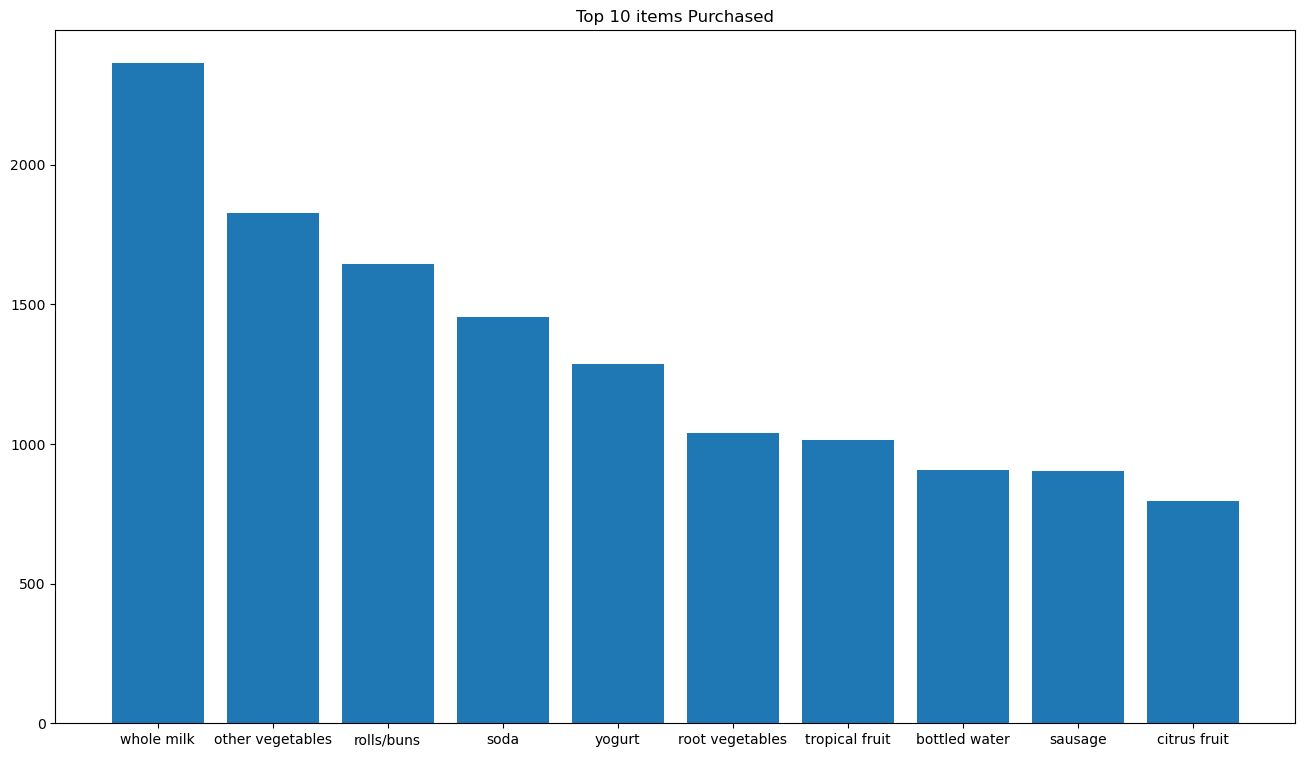

In [113]:
bars=item_distr['itemDescription']
height=item_distr['Frequency']
x_pos =np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x_pos,height)
plt.title('Top 10 items Purchased')
plt.xticks(x_pos,bars)
plt.show()


whole milk, vegetables,rolls/buns,soda etc are most bought items

## Items sold by Month

In [114]:
df1_date=df1.set_index(['Date'])
df1_date.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


<Axes: title={'center': 'Number of items sold'}, xlabel='Date'>

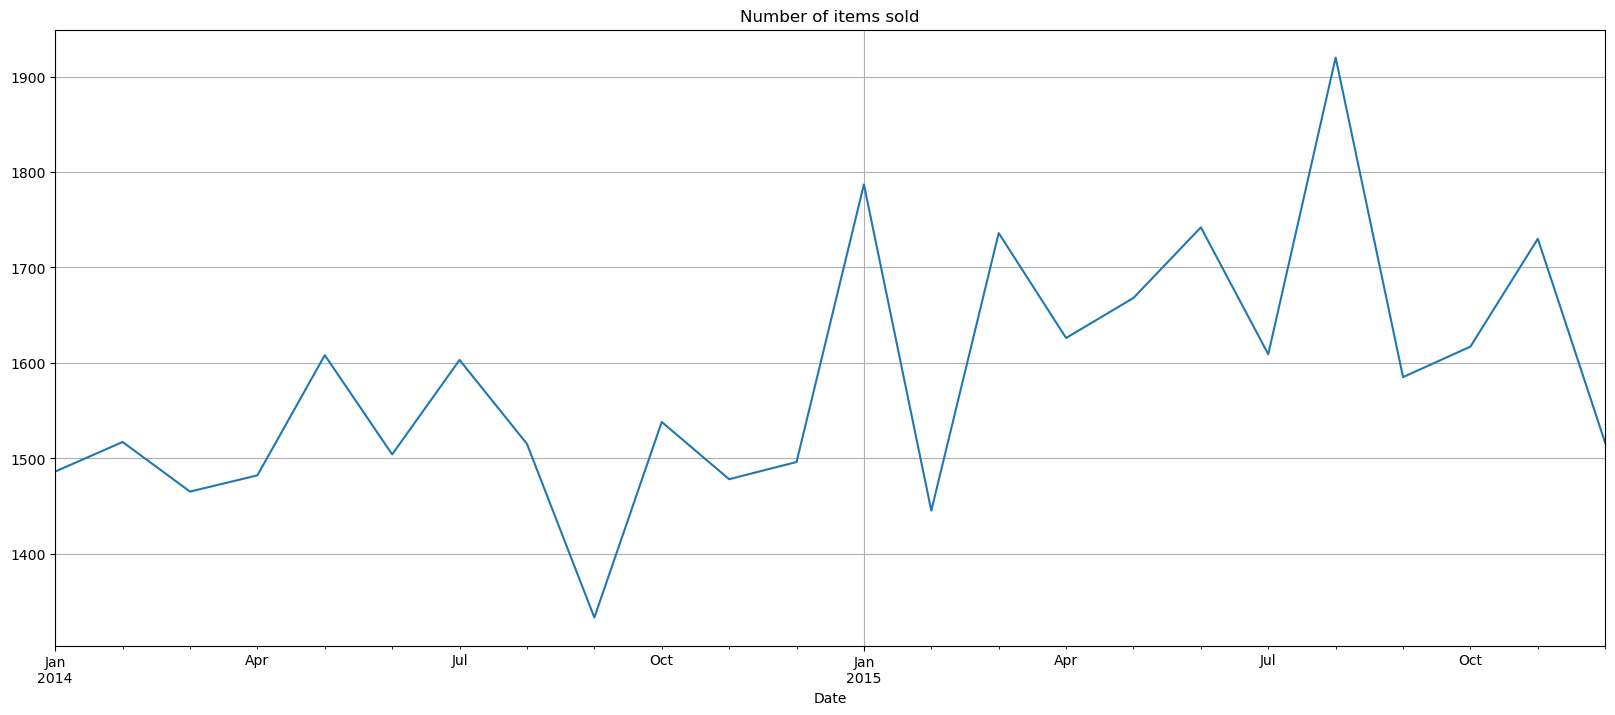

In [115]:
df1_date.resample("M")["itemDescription"].count().plot(figsize=(20,8),grid=True,title='Number of items sold')

September has highest no of selling

## Groupby using Member number

In [117]:
df2=pd.crosstab(df1['Member_number'],df1['itemDescription']).reset_index()

In [118]:
df3=df2.set_index('Member_number')

In [119]:
df3.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [120]:
row=df3.shape[0]
col=df3.shape[1]

In [121]:
item_list=df1.itemDescription.unique()

## Transaction Encoding: Getting the list of transactions

In [122]:
item_list

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

## Items Purchased by Each Member

In [123]:
List_item=[]
for i in range(row):
    temp=[]
    for j in item_list:
        if df2.loc[i,j]>=1:
            temp.append(j)
    List_item.append(temp)

In [124]:
List_item

[['whole milk',
  'yogurt',
  'sausage',
  'pastry',
  'canned beer',
  'misc. beverages',
  'soda',
  'pickled vegetables',
  'salty snack',
  'hygiene articles',
  'semi-finished bread'],
 ['whole milk',
  'rolls/buns',
  'beef',
  'frankfurter',
  'sausage',
  'soda',
  'curd',
  'whipped/sour cream',
  'white bread'],
 ['tropical fruit',
  'whole milk',
  'other vegetables',
  'butter',
  'butter milk',
  'sugar',
  'specialty chocolate',
  'frozen vegetables'],
 ['rolls/buns',
  'sausage',
  'root vegetables',
  'frozen meals',
  'detergent',
  'dental care'],
 ['tropical fruit',
  'whole milk',
  'pip fruit',
  'other vegetables',
  'rolls/buns',
  'packaged fruit/vegetables',
  'chocolate',
  'root vegetables',
  'pastry',
  'canned beer',
  'red/blush wine',
  'shopping bags',
  'dish cleaner',
  'cling film/bags',
  'frozen fish',
  'hygiene articles'],
 ['rolls/buns', 'margarine', 'whipped/sour cream'],
 ['whole milk',
  'rolls/buns',
  'frankfurter',
  'chicken',
  'chocolat

In [125]:
df3['Items_list']=List_item
df3.head()

C:\Users\shromana\AppData\Local\Temp\ipykernel_12228\34805744.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3['Items_list']=List_item


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Items_list
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,2,0,0,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[tropical fruit, whole milk, other vegetables,..."
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,"[tropical fruit, whole milk, pip fruit, other ..."


In [126]:
basket=df3[['Items_list']]

In [127]:
basket

itemDescription,Items_list
Member_number,
1000,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,"[tropical fruit, whole milk, other vegetables,..."
1003,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,"[tropical fruit, whole milk, pip fruit, other ..."
...,...
4996,"[tropical fruit, rolls/buns, bottled water, mi..."
4997,"[tropical fruit, whole milk, canned beer, grap..."
4998,"[rolls/buns, curd]"


In [128]:
df3=df3.drop(['Items_list'],axis=1)

In [129]:
df3.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [130]:
def encode_units(x):
    if x>=1:
        return 1
    else:
        return 0

In [131]:
basket_trans=df3.applymap(encode_units)
basket_trans.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [144]:
df4=basket_trans.reset_index()

In [145]:
df4.head()

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1001,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
2,1002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [146]:
df4.drop(columns=['Member_number'], inplace=True)

 The support of an itemset is the proportion of transactions in the dataset that contain that itemset. In this case, the value is set to 0.15, indicating that only itemsets with a support of at least 15% will be considered frequent.

# Association Rule Mining

In [147]:
apriori(df4,min_support=0.15, use_colnames=True)

C:\Users\shromana\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.158799,(bottled beer)
1,0.213699,(bottled water)
2,0.165213,(canned beer)
3,0.185480,(citrus fruit)
4,0.376603,(other vegetables)
5,0.177527,(pastry)
6,0.170600,(pip fruit)
7,0.349666,(rolls/buns)
8,0.230631,(root vegetables)
9,0.206003,(sausage)


* The itemset (whole milk, other vegetables) has a support of 0.191380, indicating that 19.14% of transactions contain both whole milk and other vegetables.
* The itemset (rolls/buns, whole milk) has a support of 0.178553, indicating that 17.86% of transactions contain both rolls/buns and whole milk.

In [148]:
frequent_itemsets = apriori(df4, min_support=0.15, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\shromana\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.158799,(bottled beer),1
1,0.213699,(bottled water),1
2,0.165213,(canned beer),1
3,0.185480,(citrus fruit),1
4,0.376603,(other vegetables),1
5,0.177527,(pastry),1
6,0.170600,(pip fruit),1
7,0.349666,(rolls/buns),1
8,0.230631,(root vegetables),1
9,0.206003,(sausage),1


These frequent itemsets provide insights into the relationships between different items frequently bought together, with itemsets of length 2 indicating associations between pairs of items. 

In [132]:
whole_milk=basket_trans.loc[basket_trans['whole milk']==1]
whole_milk

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


Each row represents a transaction, and each column represents an item

### Support Confidence Lift 

Measure 1: Support.
This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. 

Measure 2: Confidence.
This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.

Measure 3: Lift.
This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is

In [37]:
## Using Apriori Algorithm, Creating Association Rule for the sample item
frequent_itemsets=apriori(whole_milk,min_support=0.15,use_colnames=True)
frequent_itemsets

C:\Users\shromana\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.186450,(bottled beer)
1,0.245241,(bottled water)
2,0.152296,(brown bread)
3,0.190370,(canned beer)
4,0.201568,(citrus fruit)
5,0.153415,(domestic eggs)
6,0.157895,(newspapers)
7,0.417693,(other vegetables)
8,0.198768,(pastry)
9,0.189810,(pip fruit)


* support for 'whole milk' is 1.0, it means 'whole milk' appears in every transaction.
* Itemsets represent combinations of items that appear together in transactions. For instance, the itemset (whole milk, bottled beer) means 'whole milk' and 'bottled beer' are bought together in transactions.

## Association Rules

In [133]:
whole_milk_rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

* Antecedents: These are the items that are found in the transactions before the arrow.
* Consequents: These are the items that are found in the transactions after the arrow.
* Antecedent Support: This is the support of the antecedent item(s), indicating the proportion of transactions that contain the antecedent item(s).
* Consequent Support: This is the support of the consequent item(s), indicating the proportion of transactions that contain the consequent item(s).
* Support: This is the support for the rule, indicating the proportion of transactions that contain both the antecedent and consequent item(s).
* Confidence: This is the confidence of the rule, indicating the likelihood of the consequent item(s) being purchased given that the antecedent item(s) were purchased.
* Lift: This is the lift of the rule, indicating the ratio of the observed support to that expected if the antecedent and consequent were independent. A lift greater than 1 suggests that the presence of the antecedent has a positive effect on the consequent's occurrence.
* Leverage: This is the difference between the observed support and the expected support if the antecedent and consequent were independent. It measures how much more often the antecedent and consequent occur together than expected if they were independent.
* Conviction: This measures the ratio of the expected frequency that X occurs without Y (if X and Y were independent) to the observed frequency of occurrence of X without Y. A high conviction value means that the consequent is highly dependent on the antecedent.
* Zhang's Metric: This is an alternative measure of rule interestingness, providing a metric for evaluating association rules.

In [134]:
whole_milk_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
1,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640
2,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
3,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
4,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
5,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
6,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
7,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184


* The association rule {yogurt} => {whole milk} reveals a significant relationship between the purchase of yogurt and whole milk. With a confidence of 53.22%, customers who buy yogurt are likely to also purchase whole milk. This suggests that yogurt and whole milk are commonly bought together, potentially indicating a complementary relationship between these items.

* The association rule {whole milk} => {other vegetables} highlights a notable association between the purchase of whole milk and other vegetables. With a confidence of 41.77%, customers who buy whole milk are likely to also purchase other vegetables. This suggests that there is a tendency for customers to buy staple grocery items like milk alongside fresh produce, indicating a preference for a balanced diet.
* The lift of 1.161510 indicates that the likelihood of purchasing whole milk when yogurt is purchased is 1.1615 times higher than the likelihood of purchasing whole milk in general. This suggests a positive association between yogurt and whole milk.
* The lift of 1.114484 suggests a moderate positive association between rolls/buns and whole milk. Customers who buy rolls/buns are 1.1145 times more likely to also buy whole milk compared to what would be expected by chance alone.

## Function which returns the items that are likely to be bought by the user

This Python function freq_bought(item) seems to aim at finding items frequently bought together with a given item.

In [139]:
def freq_bought(item):
    item_df = basket_trans.loc[basket_trans[item] == 1]
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    sorted_rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)
    print('Items frequently bought together with {0}:'.format(item))
    print(sorted_rules.head(6))
    return sorted_rules['consequents'].unique()[:6]


In [138]:
display(freq_bought('brown bread'))

Items frequently bought together with brown bread:
                 antecedents                consequents  antecedent support  \
0               (rolls/buns)                     (soda)            0.392453   
1                     (soda)               (rolls/buns)            0.347170   
2  (rolls/buns, brown bread)                     (soda)            0.392453   
3        (brown bread, soda)               (rolls/buns)            0.347170   
4               (rolls/buns)        (brown bread, soda)            0.392453   
5                     (soda)  (rolls/buns, brown bread)            0.347170   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.347170  0.164151    0.418269  1.204797  0.027903    1.122220   
1            0.392453  0.164151    0.472826  1.204797  0.027903    1.152461   
2            0.347170  0.164151    0.418269  1.204797  0.027903    1.122220   
3            0.392453  0.164151    0.472826  1.204797  0.027903    1.152461   


C:\Users\shromana\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([frozenset({'soda'}), frozenset({'rolls/buns'}),
       frozenset({'brown bread', 'soda'}),
       frozenset({'rolls/buns', 'brown bread'}),
       frozenset({'whole milk'}), frozenset({'yogurt'})], dtype=object)

In [140]:
rules_result=list(rules)
print("There are {} Relation derived.".format(len(rules_result)))

There are 10 Relation derived.


## Top 10 Association Rule for specific item


 Finding association rules for transactions containing 'whole milk', and then sorting these rules based on lift in descending order to extract the top 10 rules

In [46]:
item=basket_trans.loc[basket_trans['whole milk']==1]
frequent_items=apriori(item,min_support=0.15,use_colnames=True)
rules=association_rules(frequent_items,metric="lift",min_threshold=1)
top_rules=rules.sort_values(by='lift',ascending=False).head(10)
top_rules

C:\Users\shromana\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
57,(yogurt),"(whole milk, other vegetables)",0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
54,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
20,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208
59,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
56,"(whole milk, other vegetables)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
21,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523
47,(other vegetables),"(rolls/buns, whole milk)",0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163
42,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954
44,"(whole milk, other vegetables)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163
45,(rolls/buns),"(whole milk, other vegetables)",0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954


* The rule (yogurt) => (whole milk, other vegetables) and its counterpart indicate a relationship between the purchase of yogurt and the joint purchase of whole milk and other vegetables.
* The support of 0.156775 indicates that 15.68% of transactions contain yogurt, whole milk, and other vegetables together.
* The confidence of 47.70% suggests that almost half of the transactions containing yogurt also contain both whole milk and other vegetables.
* The lift of 1.141991 indicates that the likelihood of purchasing whole milk and other vegetables together given the purchase of yogurt is 1.14 times higher than if they were independent. This suggests a moderate positive association between yogurt and the combination of whole milk and other vegetables.

In [141]:
top_rules['antecedants_n']=top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents_n']=top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

In [142]:
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedants_n,consequents_n
57,(yogurt),"(whole milk, other vegetables)",0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208,yogurt,"whole milk, other vegetables"
54,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208,"yogurt, whole milk",other vegetables
20,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,0.019493,1.113401,0.185208,yogurt,other vegetables
59,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523,other vegetables,"yogurt, whole milk"
56,"(whole milk, other vegetables)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523,"whole milk, other vegetables",yogurt
21,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,0.019493,1.074708,0.213523,other vegetables,yogurt
47,(other vegetables),"(rolls/buns, whole milk)",0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163,other vegetables,"rolls/buns, whole milk"
42,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954,"rolls/buns, whole milk",other vegetables
44,"(whole milk, other vegetables)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,0.016397,1.068745,0.157163,"whole milk, other vegetables",rolls/buns
45,(rolls/buns),"(whole milk, other vegetables)",0.389698,0.417693,0.179171,0.459770,1.100736,0.016397,1.077887,0.149954,rolls/buns,"whole milk, other vegetables"


## Visualisation

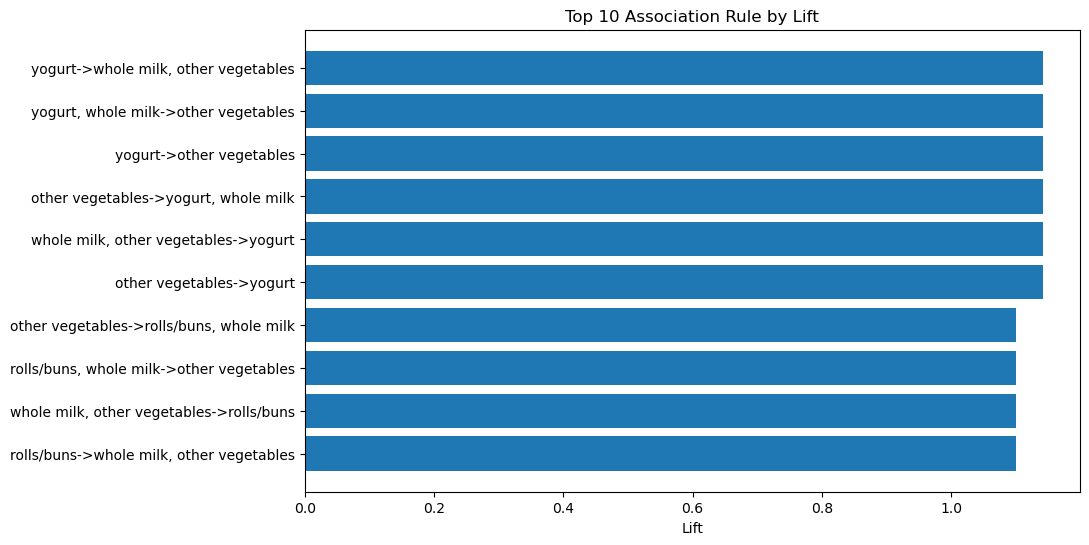

In [143]:
plt.figure(figsize=(10,6))
plt.barh(range(len(top_rules)),top_rules['lift'],tick_label=top_rules['antecedants_n'] + '->'+top_rules['consequents_n'])
plt.xlabel('Lift')
plt.title('Top 10 Association Rule by Lift')
plt.gca().invert_yaxis()
plt.show()
         

Conclusions:

* The analysis of association rules provides valuable insights into customer purchasing behavior and item relationships. These insights can be leveraged for various marketing strategies, including product bundling, cross-selling, and targeted promotions. For instance, retailers could strategically place related items in close proximity to encourage additional purchases based on observed associations.

* Based on the identified associations, retailers can optimize product placement, promotions, and inventory management strategies. For example, promoting complementary items together or offering discounts on related products could potentially increase sales and enhance customer satisfaction. Additionally, retailers could use these insights to personalize marketing campaigns and improve customer targeting.
* The association rule mining analysis offers actionable insights that can drive decision-making processes for retailers seeking to optimize sales and enhance the shopping experience for their customers.